*任务大纲*
1. **数据下载**：
   - 下载丰田（TM）、通用汽车（GM）和福特（F）的股票历史数据。

2. **趋势可视化**：
   - 绘制三只股票的趋势图。

3. **丰田股票移动平均线**：
   - 计算并可视化丰田股票的长期和短期移动平均线。

4. **线性回归量化趋势**：
   - 对通用汽车和福特的股票进行线性回归，量化它们的趋势。

5. **波动率计算**：
   - 计算各股票的波动率（标准差），并与S&P 500指数的波动率对比VIX指数。

6. **最长上涨周期**：
   - 找到每只股票的最长上涨周期，并在图中用绿色阴影高亮显示。

7. **最大利润买卖点**：
   - 找到每只股票的最大利润买卖点，用蓝色标注买入点，红色标注卖出点。

In [1]:
import pandas as pd
import yfinance as yf

# 第一步：下载股票数据，并返回前几行（head），以表格形式展示
def download_and_show_data_as_table(tickers):
    data = {}  # 初始化一个空字典用于存储每个股票的数据
    for ticker in tickers:
        stock = yf.Ticker(ticker)  # 使用yfinance获取股票信息
        stock_data = stock.history(period="1y")  # 下载过去一年的历史数据
        data[ticker] = stock_data.head()  # 只保留每个股票的前5行数据
    return data

# 股票代码列表：TM（丰田），GM（通用汽车），F（福特）
tickers = ['TM', 'GM', 'F']

# 下载股票数据，并获取每只股票的前5行数据
stock_data_head = download_and_show_data_as_table(tickers)

# 第二步：以表格形式展示数据
# 使用 to_markdown() 格式化表格，使其更易读
for ticker, df in stock_data_head.items():
    print(f"\n{ticker} 的股票数据:\n")  # 输出股票代码
    print(df.to_markdown())  # 将每只股票的前5行数据打印为表格



TM 的股票数据:

| Date                      |   Open |   High |    Low |   Close |   Volume |   Dividends |   Stock Splits |
|:--------------------------|-------:|-------:|-------:|--------:|---------:|------------:|---------------:|
| 2023-09-13 00:00:00-04:00 | 183.76 | 184.35 | 183.38 |  183.98 |   264300 |           0 |              0 |
| 2023-09-14 00:00:00-04:00 | 186.5  | 188.05 | 186.25 |  187.98 |   360500 |           0 |              0 |
| 2023-09-15 00:00:00-04:00 | 190.67 | 190.86 | 188.95 |  189.2  |   393600 |           0 |              0 |
| 2023-09-18 00:00:00-04:00 | 188.66 | 189.05 | 187.75 |  188.96 |   211200 |           0 |              0 |
| 2023-09-19 00:00:00-04:00 | 194.46 | 195.65 | 194.11 |  195.04 |   468300 |           0 |              0 |

GM 的股票数据:

| Date                      |    Open |    High |     Low |   Close |      Volume |   Dividends |   Stock Splits |
|:--------------------------|--------:|--------:|--------:|--------:|------------:|------------:|-

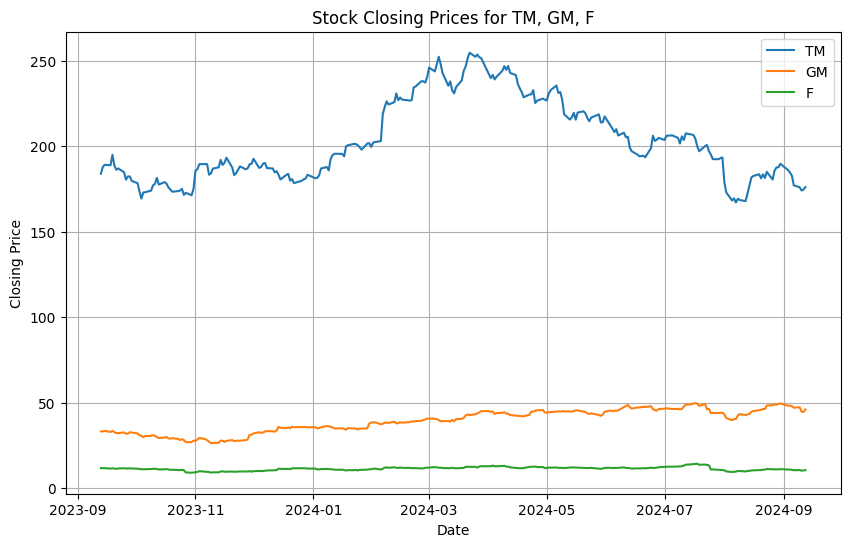

In [2]:
import matplotlib.pyplot as plt

# Step 3: 下载并简化数据，只保留日期和收盘价
def download_and_simplify_data(tickers):
    data = {}
    for ticker in tickers:
        stock = yf.Ticker(ticker)
        stock_data = stock.history(period="1y")  # 下载过去一年的数据
        # 只保留 'Close'（收盘价），日期会自动作为索引
        stock_data_simplified = stock_data[['Close']]
        data[ticker] = stock_data_simplified
    return data

# Step 4: 可视化每只股票的收盘价与日期的关系
def visualize_stock_data(data):
    plt.figure(figsize=(10, 6))  # 设置图形大小
    for ticker, stock_data in data.items():
        plt.plot(stock_data.index, stock_data['Close'], label=ticker)  # x轴为日期，y轴为收盘价
    plt.title('Stock Closing Prices for TM, GM, F')  # 设置图表标题
    plt.xlabel('Date')  # 设置x轴标签
    plt.ylabel('Closing Price')  # 设置y轴标签
    plt.legend()  # 显示图例
    plt.grid(True)  # 添加网格
    plt.show()  # 显示图表

# Step 5: 设置股票代码
tickers = ['TM', 'GM', 'F']  # 丰田，通用汽车，福特

# 下载并简化数据，只保留收盘价和日期
data = download_and_simplify_data(tickers)

# 可视化数据
visualize_stock_data(data)

接下来我我们做一些**分析**

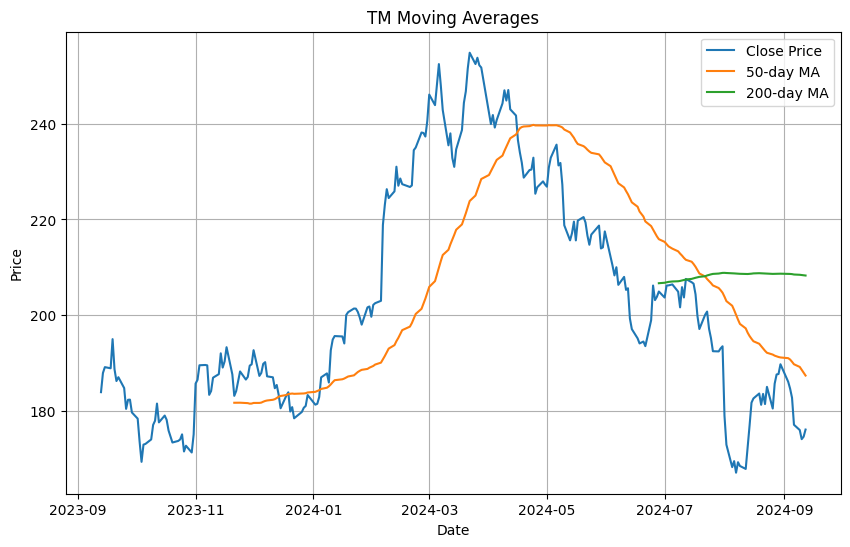

In [3]:
#1.计算丰田（TM）股票的长期和短期移动平均线
# 什么是移动平均线？

# 短期移动平均线（Short-term Moving Average，通常为50天）：主要用来捕捉股票的短期趋势，帮助我们判断近期的价格波动趋势。
# 长期移动平均线（Long-term Moving Average，通常为200天）：用于衡量股票的长期趋势，帮助我们判断更长时间的价格方向。
# 为什么要做这个分析？

# 为了看它们的交叉点：当短期移动平均线突破长期移动平均线时，这可能是一个买入信号，称为“金叉”。反之，当短期移动平均线跌破长期移动平均线时，可能是卖出信号，称为“死叉”。
# 通过移动平均线，可以平滑股价波动，帮助我们识别趋势。

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 下载丰田股票数据并计算移动平均线
def calculate_moving_averages(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")  # 下载过去一年的数据
    
    # 计算短期和长期移动平均线
    stock_data['Short_MA'] = stock_data['Close'].rolling(window=50).mean()  # 50天短期移动平均线
    stock_data['Long_MA'] = stock_data['Close'].rolling(window=200).mean()  # 200天长期移动平均线
    
    # 可视化数据
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')  # 收盘价
    plt.plot(stock_data.index, stock_data['Short_MA'], label='50-day MA')  # 短期移动平均线
    plt.plot(stock_data.index, stock_data['Long_MA'], label='200-day MA')  # 长期移动平均线
    plt.title(f'{ticker} Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# 计算丰田股票的移动平均线
calculate_moving_averages('TM')



从图中可以清楚地看到，在接近2024年7月左右，50日短期移动平均线从上方跌破了200日长期移动平均线，形成了一个死叉。
这种现象通常被视为看跌信号，表明可能会出现进一步的价格下跌。

短期趋势分析：50日移动平均线（橙色线）从2024年4月开始逐渐下滑，表明丰田股票在短期内处于下行趋势。在图的右侧，收盘价显著低于50日和200日均线，这表明短期内市场**看跌情绪占主导**。
长期趋势分析：200日移动平均线（绿色线）保持平稳，这通常意味着**丰田股票在长期内的走势较为稳定**，尽管近期价格下跌严重，但整体长期趋势并没有显示出明显的急剧下滑。

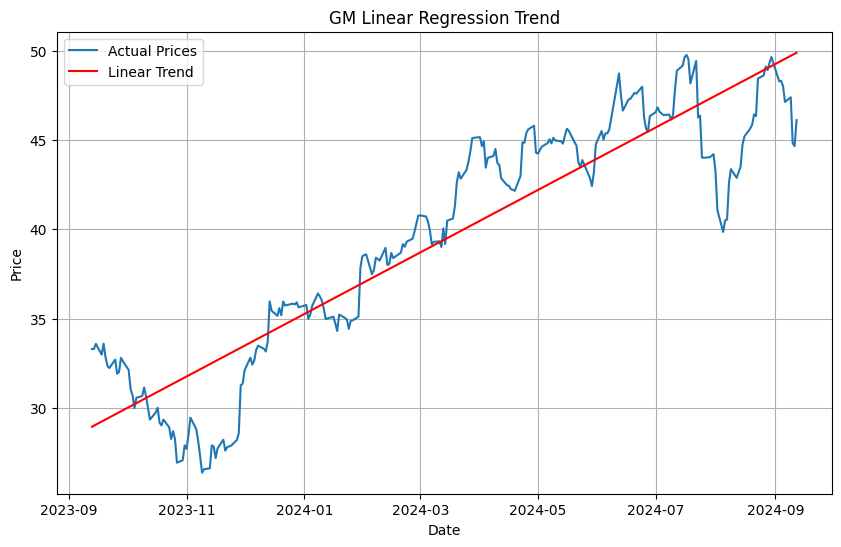

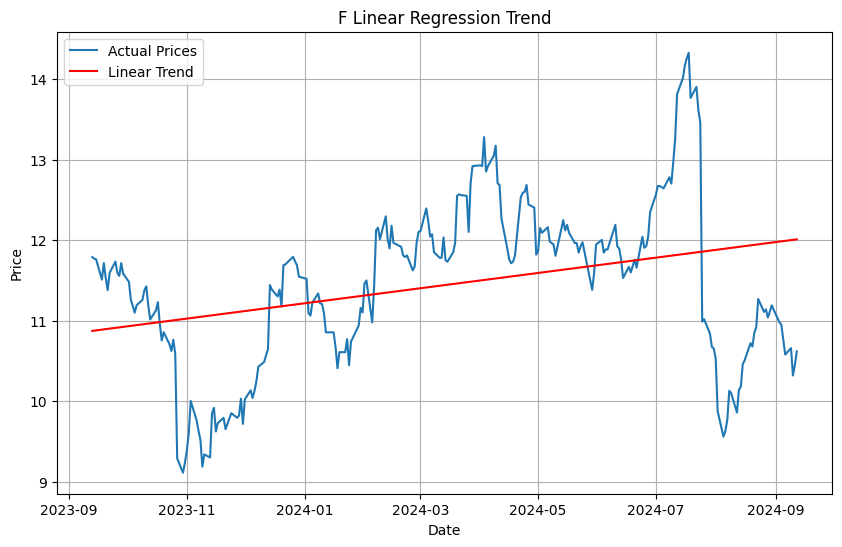

In [4]:
# 2. 使用线性回归量化GM和F股票的趋势

from sklearn.linear_model import LinearRegression
import numpy as np

# 使用线性回归预测未来趋势
def linear_regression_trend(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")
    stock_data = stock_data.reset_index()  # 重置索引，方便处理日期
    
    # 转换日期为数值型，以便进行回归
    stock_data['Date_ordinal'] = pd.to_datetime(stock_data['Date']).map(pd.Timestamp.toordinal)
    
    # 准备数据
    X = np.array(stock_data['Date_ordinal']).reshape(-1, 1)
    y = stock_data['Close']
    
    # 创建线性回归模型并拟合数据
    model = LinearRegression()
    model.fit(X, y)
    
    # 预测未来价格趋势
    stock_data['Trend'] = model.predict(X)
    
    # 可视化线性回归
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Actual Prices')
    plt.plot(stock_data['Date'], stock_data['Trend'], label='Linear Trend', color='red')
    plt.title(f'{ticker} Linear Regression Trend')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# 分别计算GM和F的趋势
linear_regression_trend('GM')
linear_regression_trend('F')



GM（通用汽车）线性回归图：
趋势：线性回归线的斜率是正值，这表明 GM 在过去一年的整体趋势是上涨的。尽管价格在不同的时期内有波动，尤其是接近年底的上涨趋势比较明显，但线性回归表明**长期来看，GM 股票的价格在缓慢上升。**

波动：尽管回归线显示上涨趋势，**但实际价格波动较大**，尤其是图表中的几个高峰和低谷（例如2024年3月至2024年7月间的大幅波动）。这表明 GM 股票价格**在短期内具有较高的波动性**。


F（福特）线性回归图：
趋势：与 GM 类似，福特的线性回归线也显示出正斜率，这表明**福特的股票价格在过去一年中有轻微上涨趋势**。但是，**涨幅非常小**，线性回归线几乎接近水平，表明福特股票的总体价格变化不大。

波动：**福特的实际价格波动更加剧烈，尤其是在2023年11月和2024年7月之间的急剧下降和反弹**。尽管线性回归显示轻微的上升趋势，但价格的波动性较大，并且呈现出几个明显的峰谷。

3.计算股票的波动率（Volatility Rate）
什么是波动率？

波动率是股票价格的变化率，可以衡量市场的不确定性和风险。高波动率意味着价格波动剧烈，风险较大。

波动率标准（常见区间划分）：
0% - 20%：低波动率

特点：股票价格相对稳定，波动幅度较小。
代表：像消费品、公共事业等行业的公司，通常市场需求较为稳定，价格不会剧烈波动。
适合：风险厌恶型投资者，追求长期、稳定收益的投资者。这些股票的风险较小，收益稳定，但上涨潜力也相对有限。
20% - 40%：中等波动率
例子：宝洁（Procter & Gamble），可口可乐（Coca-Cola）。

特点：股票价格有一定的波动，适度的风险和潜在收益。
代表：大部分蓝筹股、成熟行业如金融、制造业。价格波动适中，可能受到宏观经济、行业周期等影响。
适合：愿意承受一定风险，但仍希望获得稳健回报的投资者。中长期投资者在这个区间内可能会找到较好的买入和持有机会。
40% - 60%：高波动率
例子：银行股（如摩根大通、美国银行）、大型制造公司（如丰田、通用）。

特点：价格大幅波动，市场不确定性增加。
代表：科技股、成长型公司、新兴市场公司等。这类股票可能经历快速增长，但也可能大幅下跌。市场情绪、公司事件（如盈利预期）、政策变化等对价格影响较大。
适合：高风险偏好者，通常更适合短期投机交易或积极型投资者。这类股票可以提供快速的收益，也伴随着较大的风险。
60% 以上：极高波动率
例子：科技股（如Tesla、NVIDIA）、新兴市场股票。

特点：极端波动，可能出现剧烈的价格上涨或下跌。非常不稳定，风险非常高。
代表：小市值公司、IPO股、加密货币、波动性极高的成长股。它们的价格可能受到市场情绪的剧烈影响，一些小事件可能引发巨大波动。
适合：非常有经验且对风险高度承受的投资者，通常进行短期投机、套利等操作。虽然有机会获得暴利，但也面临巨大亏损的可能。
例子：比特币、新兴IPO股票。

In [5]:
# 计算股票的波动率（标准差）
def calculate_volatility(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")
    
    # 计算每日收益率
    stock_data['Returns'] = stock_data['Close'].pct_change()
    
    # 计算波动率（年度标准差）
    volatility = stock_data['Returns'].std() * np.sqrt(252)  # 252是股票市场一年的交易天数
    print(f'{ticker}的年化波动率为: {volatility:.2%}')

# 分别计算丰田、GM和福特的波动率
calculate_volatility('TM')
calculate_volatility('GM')
calculate_volatility('F')


TM的年化波动率为: 26.59%
GM的年化波动率为: 31.15%
F的年化波动率为: 38.12%


总结分析：
**丰田（TM）** 作为全球汽车行业的领导者，展现出了**低波动、稳定增长的特点**。其全球布局和品牌价值使得其在经济波动中表现相对稳健，适合那些追求长期回报、风险厌恶型的投资者。

**通用汽车（GM）** 展现了**中等波动率**，其股价波动反映了市场对其电动汽车转型的期待和不确定性。它适合那些愿意承担适度风险、看好未来汽车技术发展的投资者。

**福特（F）** 的**高波动率**显示出其在市场上的不确定性较大，尤其是在电动汽车领域的转型上面临更多挑战。虽然波动性大，但对于投机者或希望通过短期交易获利的投资者来说，它提供了更多的机会。

4.计算S&P 500的波动率并与VIX对比

In [6]:
# 计算S&P 500的波动率
def calculate_sp500_volatility():
    sp500 = yf.Ticker('^GSPC')
    sp500_data = sp500.history(period="1y")
    
    # 计算每日收益率
    sp500_data['Returns'] = sp500_data['Close'].pct_change()
    
    # 计算波动率
    volatility = sp500_data['Returns'].std() * np.sqrt(252)
    print(f'S&P 500的年化波动率为: {volatility:.2%}')
    return volatility

# 比较S&P 500波动率和VIX
def compare_with_vix():
    sp500_volatility = calculate_sp500_volatility()
    
    # 获取VIX数据
    vix = yf.Ticker('^VIX')
    vix_data = vix.history(period="1y")
    
    # VIX代表预期的市场波动率，可以直接比较
    vix_average = vix_data['Close'].mean()
    print(f'VIX的平均波动率为: {vix_average:.2f}')
    
    # 对比S&P 500和VIX
    print(f'对比: S&P 500波动率 {sp500_volatility:.2%} 与 VIX {vix_average:.2f}')

# 计算并对比S&P500的波动率和VIX
compare_with_vix()


S&P 500的年化波动率为: 12.79%
VIX的平均波动率为: 15.05
对比: S&P 500波动率 12.79% 与 VIX 15.05


结论：
1. 波动率回顾
**丰田（TM）**的年化波动率：26.59%
**通用汽车（GM）**的年化波动率：31.15%
**福特（F）**的年化波动率：38.12%
S&P 500的年化波动率：12.79%
VIX（预期的S&P 500波动率）：15.05

2. 与S&P 500指数的对比
S&P 500作为美国股市的主要基准指数，其年化波动率是12.79%，相对较低。这是因为S&P 500包含了500家公司的多元化组合，分散了风险，降低了单一股票的波动性。

对比三只个股：
**丰田（26.59%）：波动率明显高于S&P 500**，表明丰田的个股波动比大盘更剧烈。作为全球汽车业的龙头，丰田的股票仍受到行业特定因素和区域市场的影响，因此波动性更大。
**通用汽车（31.15%）：波动率更高，超过丰田**，显示出更高的风险和市场不确定性。通用汽车的电动汽车转型、供应链问题等可能加剧了其价格波动。
**福特（38.12%）：波动率最高，几乎是S&P 500波动率的3倍**，说明市场对福特股票的未来发展更加不确定。

3. 与VIX的对比
VIX指数（15.05）反映了市场对未来30天S&P 500波动的预期。VIX值大于S&P 500的实际历史波动率，表明市场预期未来的波动性将增加，但这仍远低于个股的波动率。
个股波动率：
**丰田、通用、福特的波动率都远高于VIX**，表明市场对这些个股的波动预期大于对整体市场的预期。这说明尽管市场对整体经济波动有一定预期，但对单个汽车公司的预期波动性和不确定性更大，特别是福特。

4. 行业与个股风险
汽车行业 vs. 大盘
汽车行业的波动性高于大盘：这三只汽车公司的波动率远高于S&P 500的年化波动率。汽车行业受多重因素影响，如供应链问题（特别是芯片短缺）、电动汽车转型、新技术的落地进度，以及全球贸易政策和能源价格波动等。
这些因素使得汽车股在行业内波动性更大，相比其他更稳定的行业（如消费品、医疗保健），市场对汽车行业持更加谨慎的态度。（不确定这个信息是不是有效的）

5：找到每只股票的最长上涨周期，并在图中用绿色阴影高亮显示。

TM 最长上涨周期: 2023-10-04 00:00:00-04:00 到 2023-10-12 00:00:00-04:00，持续了 6 天


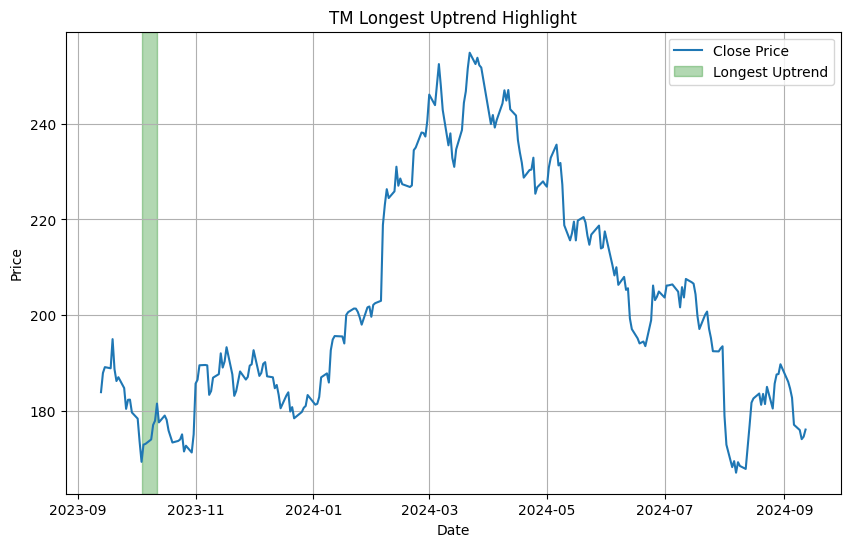

GM 最长上涨周期: 2023-11-21 00:00:00-05:00 到 2023-12-04 00:00:00-05:00，持续了 8 天


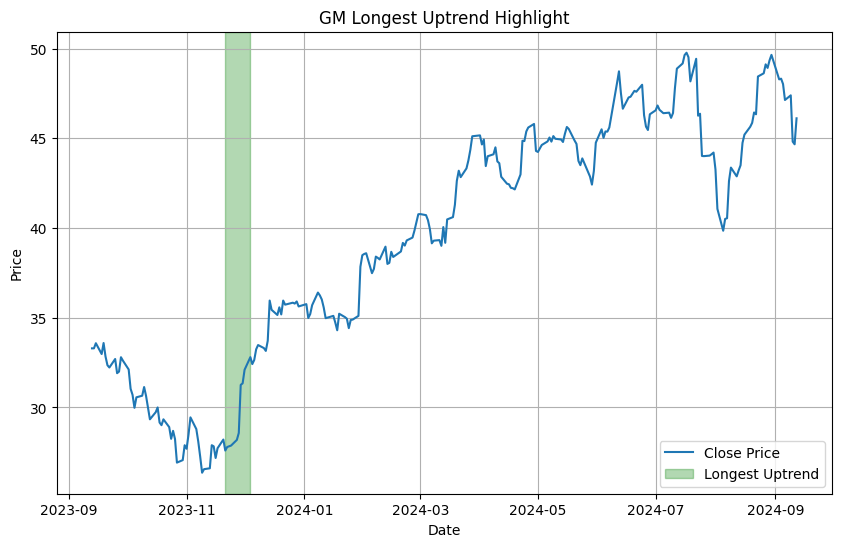

F 最长上涨周期: 2023-12-05 00:00:00-05:00 到 2023-12-14 00:00:00-05:00，持续了 7 天


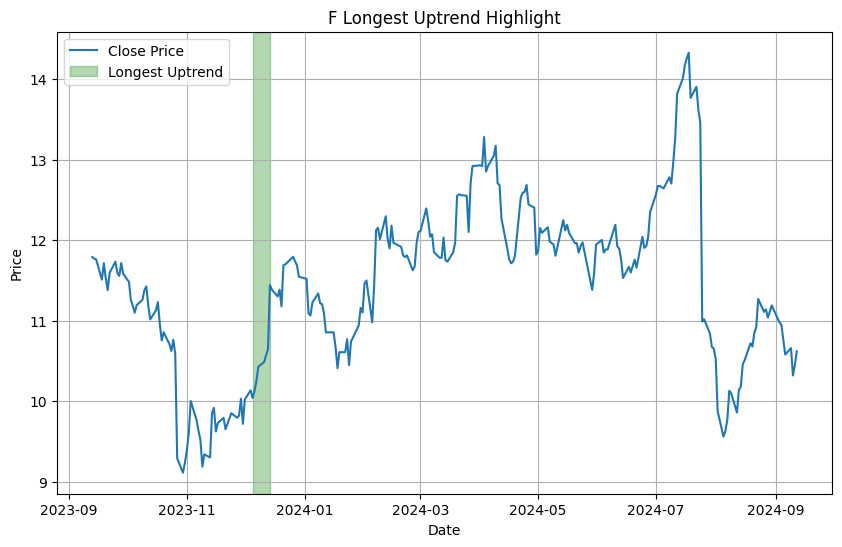

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 下载股票数据
def download_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")
    return stock_data

# 找到最长连续上涨周期
def find_longest_uptrend(stock_data):
    longest_uptrend = {'start': None, 'end': None, 'days': 0}
    current_start = None
    current_streak = 0

    for i in range(1, len(stock_data)):
        if stock_data['Close'].iloc[i] > stock_data['Close'].iloc[i - 1]:
            if current_start is None:
                current_start = stock_data.index[i - 1]
            current_streak += 1
        else:
            if current_streak > longest_uptrend['days']:
                longest_uptrend['start'] = current_start
                longest_uptrend['end'] = stock_data.index[i - 1]
                longest_uptrend['days'] = current_streak
            current_start = None
            current_streak = 0

    # 更新最后的上涨期
    if current_streak > longest_uptrend['days']:
        longest_uptrend['start'] = current_start
        longest_uptrend['end'] = stock_data.index[-1]
        longest_uptrend['days'] = current_streak

    return longest_uptrend

# 可视化股票的收盘价，并高亮显示最长上涨周期
def visualize_longest_uptrend(ticker):
    stock_data = download_stock_data(ticker)

    # 找到最长上涨周期
    longest_uptrend = find_longest_uptrend(stock_data)
    print(f"{ticker} 最长上涨周期: {longest_uptrend['start']} 到 {longest_uptrend['end']}，持续了 {longest_uptrend['days']} 天")

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')  # 收盘价

    # 高亮显示最长上涨周期
    plt.axvspan(longest_uptrend['start'], longest_uptrend['end'], color='green', alpha=0.3, label='Longest Uptrend')

    plt.title(f"{ticker} Longest Uptrend Highlight")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# 分别对 TM、GM、F 进行分析和可视化
for ticker in ['TM', 'GM', 'F']:
    visualize_longest_uptrend(ticker)


6：找到每只股票的最大利润买卖点，并在图中用蓝色标注买入点、红色标注卖出点。

TM 最大利润交易: 买入 2023-10-04 00:00:00-04:00，卖出 2024-03-22 00:00:00-04:00，利润为 85.32


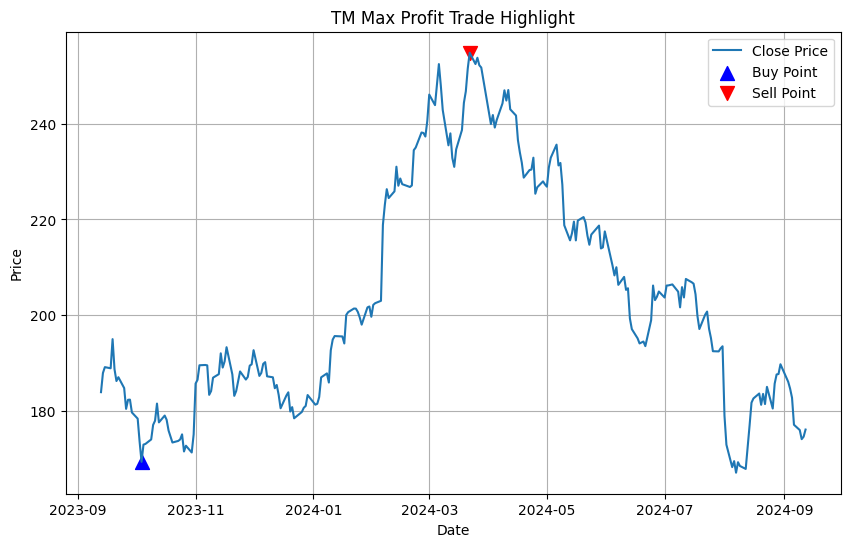

GM 最大利润交易: 买入 2023-11-09 00:00:00-05:00，卖出 2024-07-17 00:00:00-04:00，利润为 23.42


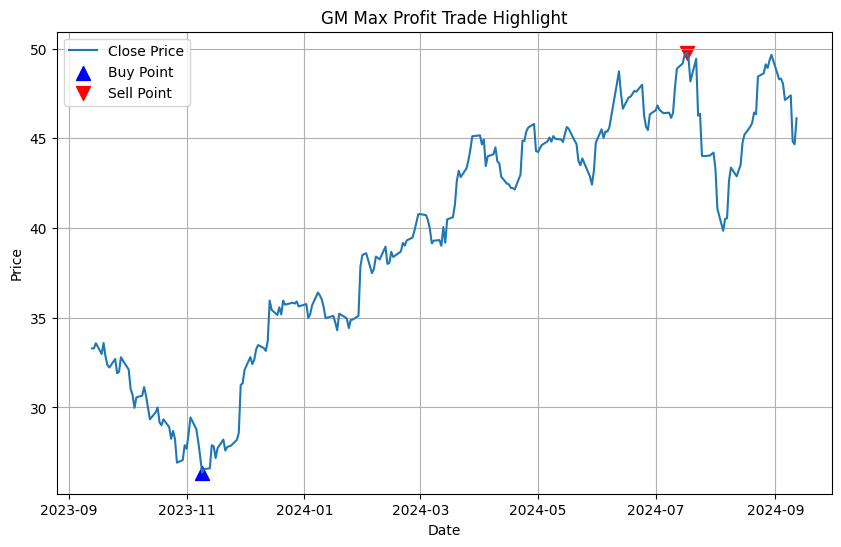

F 最大利润交易: 买入 2023-10-30 00:00:00-04:00，卖出 2024-07-18 00:00:00-04:00，利润为 5.21


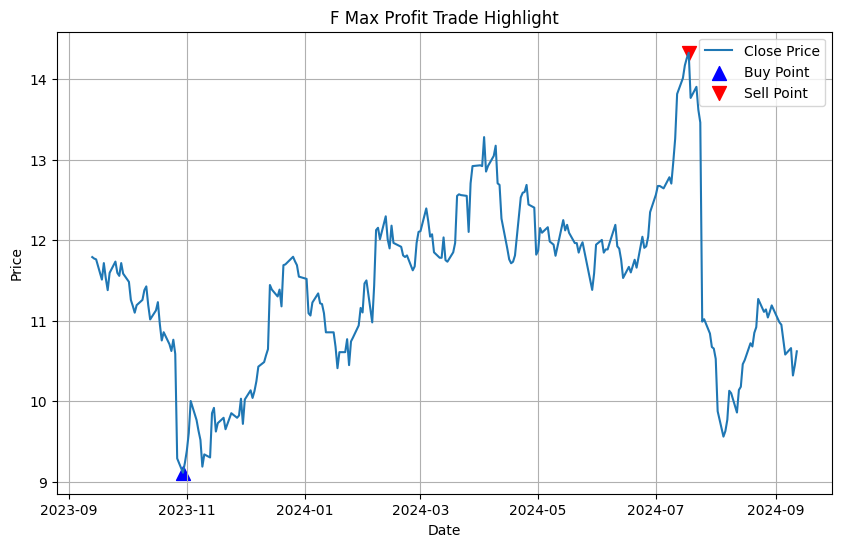

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 下载股票数据
def download_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="1y")
    return stock_data

# 找到最大利润的买卖点，确保买入日期在卖出日期之前
def find_max_profit(stock_data):
    min_price = float('inf')
    max_profit = 0
    buy_date = None
    sell_date = None

    for i in range(len(stock_data) - 1):  # 买点的日期
        for j in range(i + 1, len(stock_data)):  # 卖点的日期
            buy_price = stock_data['Close'].iloc[i]
            sell_price = stock_data['Close'].iloc[j]
            profit = sell_price - buy_price
            if profit > max_profit:
                max_profit = profit
                buy_date = stock_data.index[i]
                sell_date = stock_data.index[j]

    return {'buy_date': buy_date, 'sell_date': sell_date, 'profit': max_profit}

# 可视化最大利润的买卖点
def visualize_max_profit(ticker):
    stock_data = download_stock_data(ticker)

    # 找到最大利润的买卖点
    max_profit_trade = find_max_profit(stock_data)
    print(f"{ticker} 最大利润交易: 买入 {max_profit_trade['buy_date']}，卖出 {max_profit_trade['sell_date']}，利润为 {max_profit_trade['profit']:.2f}")

    # 可视化
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')  # 收盘价

    # 高亮显示最大利润的买卖点
    plt.scatter(max_profit_trade['buy_date'], stock_data['Close'].loc[max_profit_trade['buy_date']], color='blue', marker='^', label='Buy Point', s=100)
    plt.scatter(max_profit_trade['sell_date'], stock_data['Close'].loc[max_profit_trade['sell_date']], color='red', marker='v', label='Sell Point', s=100)

    plt.title(f"{ticker} Max Profit Trade Highlight")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# 分别对 TM、GM、F 进行分析和可视化
for ticker in ['TM', 'GM', 'F']:
    visualize_max_profit(ticker)
